In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from the CSV file
df = pd.read_csv('/content/User_Data.csv')

In [ ]:
#Observe the data
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No
...,...,...,...,...,...
395,15691863,#,46,41000,Yes
396,15706071,M,51,23000,Yes
397,15654296,#,50,20000,Yes
398,15755018,%,36,33000,No


In [ ]:
# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    User ID Gender  Age  EstimatedSalary Purchased
0  15624510    NaN   19            19000        No
1  15810944      M   35            20000        No
2  15668575      F   26            43000        No
3  15603246      F   27            57000        No
4  15804002      M   19            76000        No


In [ ]:
# Display the last 5 rows of the dataframe
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
      User ID Gender  Age  EstimatedSalary Purchased
395  15691863      #   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      #   50            20000       Yes
398  15755018      %   36            33000        No
399  15594041      #   49            36000       Yes


In [ ]:
#Shape of the dataset
df.shape

(400, 5)

In [ ]:
print("\nDataframe Information:")
df.info()


Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           382 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            User ID         Age  EstimatedSalary
count  4.000000e+02  400.000000       400.000000
mean   1.569154e+07   34.102500     69742.500000
std    7.165832e+04   15.221901     34096.960282
min    1.556669e+07    0.000000     15000.000000
25%    1.562676e+07   27.000000     43000.000000
50%    1.569434e+07   36.000000     70000.000000
75%    1.575036e+07   45.000000     88000.000000
max    1.581524e+07   60.000000    150000.000000


In [ ]:
#Checking Null Values
df.isnull().sum()

,0
User ID,0
Gender,18
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
#Counting Unique values
count = df['Age'].value_counts()
print(count)

Age
0     40
35    30
37    18
42    16
26    15
40    14
48    13
39    13
41    13
47    13
46    12
27    12
38    12
28    11
36    10
31    10
49    10
32     9
30     9
33     8
20     7
24     7
59     7
60     7
29     6
58     6
25     6
19     6
57     5
18     5
52     5
23     5
53     5
45     4
21     4
22     4
34     4
54     4
50     4
55     3
51     3
56     2
43     2
44     1
Name: count, dtype: int64


In [ ]:
# Check for unique values in categorical columns to spot inconsistencies
print("\nUnique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'Purchased':", df['Purchased'].unique())


Unique values in 'Gender': [nan 'M' 'F' '@' '#' '%' '$']
Unique values in 'Purchased': ['No' 'Yes']


In [ ]:
# Replace non-standard gender values with NaN (Not a Number)
df['Gender'] = df['Gender'].replace(['@','#','%','$'], np.nan)


In [ ]:
print("\nUnique values in 'Gender':", df['Gender'].unique())


Unique values in 'Gender': [nan 'M' 'F']


In [ ]:
#Finding most frequent Gender
mode_gender = df['Gender'].mode()[0]
print(f"\nMost frequent gender is: {mode_gender}")


Most frequent gender is: F


In [ ]:
#Fill NAN gender with most frequent gender
df['Gender'] = df['Gender'].fillna(mode_gender)

In [ ]:
#Now converting 'Gender' column into numerical values - F = 0, M = 1
df['Gender'] = df['Gender'].map({'F' : 0, 'M' : 1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Yes
396,15706071,1,51,23000,Yes
397,15654296,0,50,20000,Yes
398,15755018,0,36,33000,No


In [ ]:
# Calculate the mean of the 'Age' column, excluding the zeros
mean_age = df[df['Age'] != 0]['Age'].mean()
print(f"Mean Age (excluding zeroes) : {mean_age} ")

Mean Age (excluding zeroes) : 37.891666666666666 


In [ ]:
#Replacing all 0 age with mean age
df['Age'] = df['Age'].replace(0, mean_age)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19.0,19000,No
1,15810944,1,35.0,20000,No
2,15668575,0,26.0,43000,No
3,15603246,0,27.0,57000,No
4,15804002,1,19.0,76000,No
...,...,...,...,...,...
395,15691863,0,46.0,41000,Yes
396,15706071,1,51.0,23000,Yes
397,15654296,0,50.0,20000,Yes
398,15755018,0,36.0,33000,No


In [ ]:
#Converting floating age to int type
df['Age'] = df['Age'].astype(int)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Yes
396,15706071,1,51,23000,Yes
397,15654296,0,50,20000,Yes
398,15755018,0,36,33000,No


In [ ]:
#Drop unnecessary columns - The 'User Id' don't help in prediction so drop them
df.drop('User ID', axis = 1, inplace = True)

In [ ]:
#Processed Dataset is -
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Yes
396,1,51,23000,Yes
397,0,50,20000,Yes
398,0,36,33000,No


In [ ]:
#Verify Data is Clean

print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

print("\nInformation of the cleaned dataset:")
df.info()


First 5 rows of the cleaned dataset:
   Gender  Age  EstimatedSalary Purchased
0       0   19            19000        No
1       1   35            20000        No
2       0   26            43000        No
3       0   27            57000        No
4       1   19            76000        No

Information of the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    int64 
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    object
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
# Preprocess the Target Variable
# Our target variable 'Purchased' is categorical ('No', 'Yes').
# We need to convert it to a numerical format (0, 1) for our model.

df['Purchased'] = df['Purchased'].map({'No': 0, 'Yes': 1})


In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,0,36,33000,0


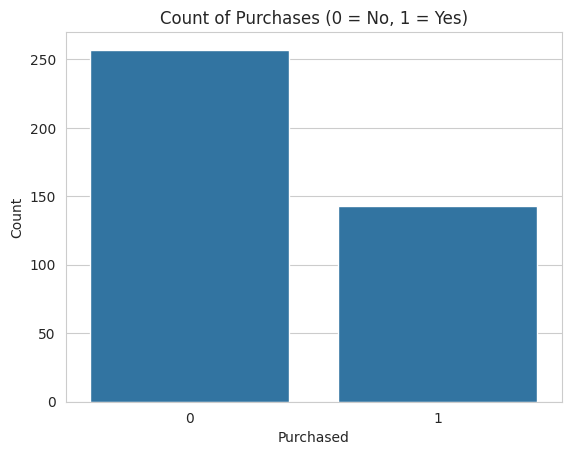

In [ ]:
# Create a count plot for the 'Purchased' variable
sns.countplot(x = 'Purchased', data = df)
plt.title('Count of Purchases (0 = No, 1 = Yes)')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

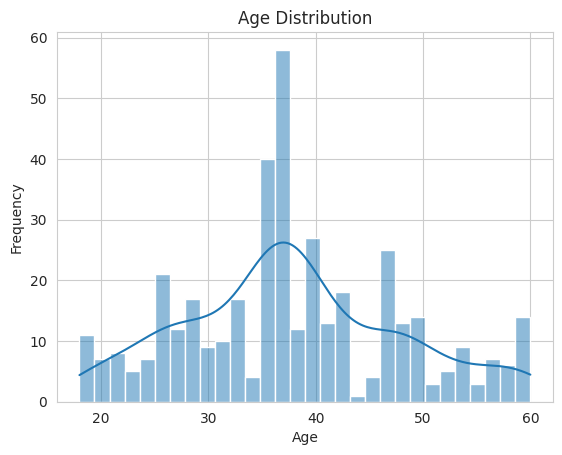

In [ ]:
# Create a histogram for the 'Age' distribution
sns.histplot(df['Age'], bins = 30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Prepare Data for Modeling (Features and Target)
X = df[['Gender','Age','EstimatedSalary']].values
y = df['Purchased'].values.reshape(-1, 1)

In [ ]:
# We also need to split our data into a training set and a testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (320, 3)
Shape of X_test: (80, 3)
Shape of y_train: (320, 1)
Shape of y_test: (80, 1)


In [ ]:
# Calculate mean and standard deviation from the training data ONLY
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Apply standardization to both training and testing data
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [ ]:
n_features = X_train_scaled.shape[1]
weights = np.zeros((n_features, 1))
bias = 0

print(f"Number of features: {n_features}")
print(f"Shape of weights: {weights.shape}")
print(f"Initial bias: {bias}")


Number of features: 3
Shape of weights: (3, 1)
Initial bias: 0


In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#Cost Function
def cost_function(y, y_pred):
    m = len(y)
    # Add a small epsilon value to prevent log(0)
    epsilon = 1e-15 # use this epsilon in practical only to prevent log(0) -> don't write in exam
    cost = (-1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))
    return cost

In [ ]:
#Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        z = np.dot(X, weights) + bias #y=m*x+c
        #Prediction using sigmoid
        y_pred = sigmoid(z)
        cost = cost_function(y, y_pred)
        cost_history.append(cost)

        #Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        if (i+1) % 100 == 0:
            print(f"Cost after iteration {i+1}: {cost}")

    return weights, bias, cost_history

In [ ]:
learning_rate = 0.1
epochs = 1000

trained_weights, trained_bias, cost_history = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, epochs)

Cost after iteration 100: 0.40706536463683424
Cost after iteration 200: 0.38283873637085725
Cost after iteration 300: 0.3761002408632898
Cost after iteration 400: 0.3735509569735019
Cost after iteration 500: 0.3724427746745642
Cost after iteration 600: 0.3719224486476506
Cost after iteration 700: 0.37166628720079936
Cost after iteration 800: 0.3715362167699561
Cost after iteration 900: 0.37146877260965244
Cost after iteration 1000: 0.3714332882723881


In [ ]:
print("Trained Weights:", trained_weights)
print("Trained Bias:", trained_bias)

Trained Weights: [[0.11554124]
 [2.16112512]
 [1.27718345]]
Trained Bias: -1.0242100241574876


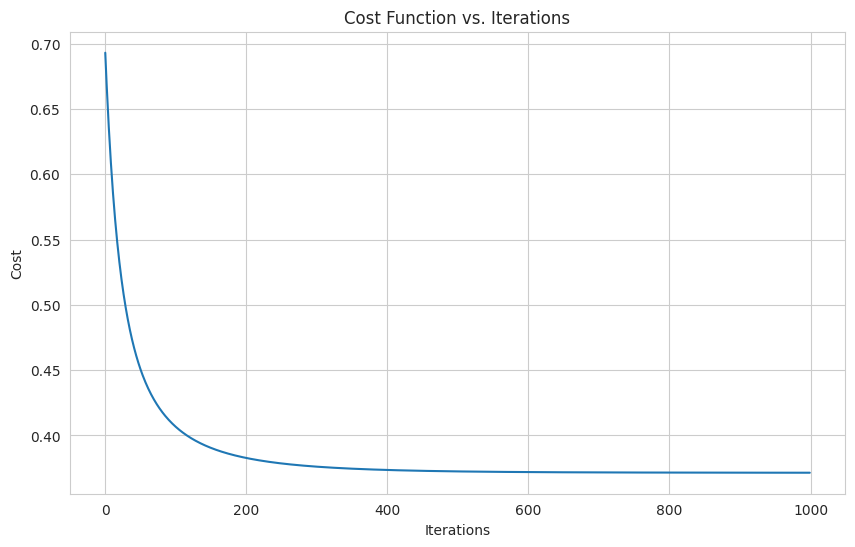

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred_proba = sigmoid(z)

    # Convert probabilities to binary predictions (0 or 1)
    y_pred_class = [1 if i > 0.5 else 0 for i in y_pred_proba]

    return np.array(y_pred_class).reshape(-1, 1)


In [ ]:
# Make predictions
y_pred_manual = predict(X_test_scaled, trained_weights, trained_bias)
print("Predictions :", y_pred_manual)

Predictions : [[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [ ]:
# Calculate accuracy
accuracy = np.mean(y_pred_manual == y_test) * 100
print(f"Accuracy of our manual Logistic Regression model: {accuracy:.2f}%")

Accuracy of our manual Logistic Regression model: 88.75%


In [ ]:
#Manual Prediction
gender_input = int(input("Enter Gender (F -> 0 /M -> 1): "))
age_input = int(input("Enter Age: "))
salary_input = int(input("Enter Estimated Salary: "))

user_data = np.array([[gender_input, age_input, salary_input]])
user_data_scaled = (user_data - mean) / std

prediction_result = predict(user_data_scaled, trained_weights, trained_bias)
print(f"\nPrediction from our Manual Model: {prediction_result}")
if prediction_result == 1:
  print("User will Purchase")
else:
  print("User will not Purchase")

Enter Gender (F -> 0 /M -> 1): 0
Enter Age: 25
Enter Estimated Salary: 15000

Prediction from our Manual Model: [[0]]
User will not Purchase


In [ ]:
#Use Scikit-learn for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred_sklearn = model.predict(X_test_scaled)

# Calculate the accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn) * 100
print(f"Accuracy of scikit-learn Logistic Regression model: {accuracy_sklearn:.2f}%")

Accuracy of scikit-learn Logistic Regression model: 88.75%


In [ ]:
#Manual Prediction
gender_input = int(input("Enter Gender (F -> 0 /M -> 1): "))
age_input = int(input("Enter Age: "))
salary_input = int(input("Enter Estimated Salary: "))

user_data = np.array([[gender_input, age_input, salary_input]])
user_data_scaled = (user_data - mean) / std

sklearn_prediction_result = model.predict(user_data_scaled)
print(f"Prediction from Scikit-learn Model: {sklearn_prediction_result}")
if sklearn_prediction_result == 1:
  print("User will Purchase")
else:
  print("User will not Purchase")

Enter Gender (F -> 0 /M -> 1): 1
Enter Age: 25
Enter Estimated Salary: 55000
Prediction from Scikit-learn Model: [0]
User will not Purchase
